In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
%load_ext autoreload
%autoreload 2
from model import logistic_regression

/Users/mohitkumar/miniconda3/envs/aim/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/mohitkumar/miniconda3/envs/aim/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2D1B8D5C-7891-3680-9CF9-F771AE880676> /Users/mohitkumar/miniconda3/envs/aim/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <CDAC6E34-8608-3E70-8B2F-32BCD38E90FB> /Users/mohitkumar/miniconda3/envs/aim/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [3]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
train_dataset = datasets.MNIST(root='data/', train=True, transform=transform, download=False)
# Load the testing dataset
test_dataset = datasets.MNIST(root='data/', train=False, transform=transform, download=False)

tensor(1)

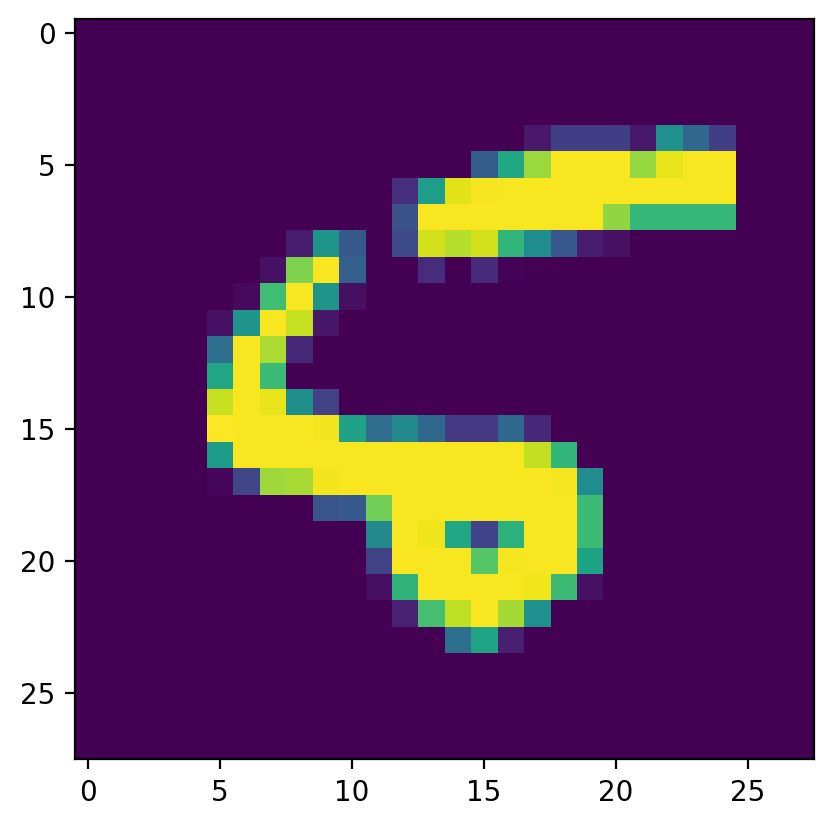

In [6]:
index = 8
plt.imshow(test_dataset.data[index])
train_dataset.targets[index]

In [5]:
X_train = torch.reshape(train_dataset.data, shape=[train_dataset.data.shape[0],train_dataset.data.shape[1] * train_dataset.data.shape[2] ]).T / 255.0 
Y_train_temp = train_dataset.targets
Y_train = torch.nn.functional.one_hot(Y_train_temp, 10).T
X_test = torch.reshape(test_dataset.data, shape=[test_dataset.data.shape[0],test_dataset.data.shape[1] * test_dataset.data.shape[2] ]).T / 255.0 
Y_test = torch.nn.functional.one_hot(test_dataset.targets, 10).T
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

torch.Size([784, 10000])
torch.Size([10, 10000])
torch.Size([784, 60000])
torch.Size([10, 60000])


In [6]:
model = logistic_regression.LinerRegression(10, X_train.shape[0],device=device)

In [8]:
model.optimize(X_train, Y_train,3000,print_cost=True)

iteration=0, cost=6.931471824645996, accuracy=0.6723499894142151%
iteration=100, cost=2.694343328475952, accuracy=0.765749990940094%
iteration=200, cost=2.2691962718963623, accuracy=0.7948499917984009%
iteration=300, cost=2.0106966495513916, accuracy=0.8104333281517029%
iteration=400, cost=1.837886095046997, accuracy=0.8199333548545837%
iteration=500, cost=1.7136708498001099, accuracy=0.8262666463851929%
iteration=600, cost=1.619463562965393, accuracy=0.8316500186920166%
iteration=700, cost=1.5450977087020874, accuracy=0.8363500237464905%
iteration=800, cost=1.4845741987228394, accuracy=0.8401666879653931%
iteration=900, cost=1.4341275691986084, accuracy=0.8440166711807251%
iteration=1000, cost=1.3912708759307861, accuracy=0.8469333052635193%
iteration=1100, cost=1.3542929887771606, accuracy=0.8497166633605957%
iteration=1200, cost=1.321974754333496, accuracy=0.852233350276947%
iteration=1300, cost=1.2934221029281616, accuracy=0.8537333607673645%
iteration=1400, cost=1.2679635286331177

In [9]:
prediction = model.predict(X_test)

In [10]:
model.accuracy(X_test, Y_test)

tensor(0.8802, device='mps:0')